In [22]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import scipy as sp
from scipy import stats # statistics

In [2]:
#엑셀로부터 데이터프레임 읽어오기
df = pd.read_excel('돈까스맛집리스트_210623_0951.xlsx', encoding='utf-8')
df.head()

,음식점,망고평점,네이버평점,네이버리뷰수,다이닝코드평점,다이닝코드별점,다이닝코드리뷰,주소,전화,종류,가격
0,시키카츠,4.7,NaN,NaN,NaN,NaN,NaN,서울시 동대문구 회기동 60-147,02-6081-8753,까스요리,만원-2만원
1,카와카츠,4.6,4.43,426.0,60.0,4.4,"[""◈ 맛집기록 #9 '카와카츠'(5.0점 / 5점 만점)- 유명한 프리미엄 돈가스...",서울시 마포구 서교동 465-1 1F 102호,070-8801-2053,까스요리,만원-2만원
2,오제제,4.6,NaN,NaN,43.0,4.6,['최근 몇년간 먹은 중에 우동과 돈까스를 가장 맛있게 먹은 곳. 가격이 별로 신경...,서울시 용산구 동자동 43-22 1F,070-4647-4650,라멘/소바/우동,만원 미만
3,카츠바이콘반,4.5,NaN,NaN,59.0,4.9,['11시 30분 오픈! 토요일이어서그런지 11시 전부터 대기 4팀이나 있드라구요....,서울시 강남구 신사동 647-22,02-547-3903,까스요리,만원-2만원
4,후니도니(르메이에르종로타운점),4.5,NaN,NaN,59.0,4.5,['유명한이유가 있어요 치즈돈까스와 모밀이 단짠단짠마냥 맛있게느끼하고 개운하고 바삭...,서울시 종로구 종로1가 24 르메이에르종로타운 B1,02-722-5402,까스요리,만원 미만


In [5]:
#평점 중에서 NaN값 제거하기

df = df.dropna(subset = ['망고평점','다이닝코드평점','다이닝코드별점'])
df.head()

,음식점,망고평점,네이버평점,네이버리뷰수,다이닝코드평점,다이닝코드별점,다이닝코드리뷰,주소,전화,종류,가격
1,카와카츠,4.6,4.43,426.0,60.0,4.4,"[""◈ 맛집기록 #9 '카와카츠'(5.0점 / 5점 만점)- 유명한 프리미엄 돈가스...",서울시 마포구 서교동 465-1 1F 102호,070-8801-2053,까스요리,만원-2만원
2,오제제,4.6,NaN,NaN,43.0,4.6,['최근 몇년간 먹은 중에 우동과 돈까스를 가장 맛있게 먹은 곳. 가격이 별로 신경...,서울시 용산구 동자동 43-22 1F,070-4647-4650,라멘/소바/우동,만원 미만
3,카츠바이콘반,4.5,NaN,NaN,59.0,4.9,['11시 30분 오픈! 토요일이어서그런지 11시 전부터 대기 4팀이나 있드라구요....,서울시 강남구 신사동 647-22,02-547-3903,까스요리,만원-2만원
4,후니도니(르메이에르종로타운점),4.5,NaN,NaN,59.0,4.5,['유명한이유가 있어요 치즈돈까스와 모밀이 단짠단짠마냥 맛있게느끼하고 개운하고 바삭...,서울시 종로구 종로1가 24 르메이에르종로타운 B1,02-722-5402,까스요리,만원 미만
5,북천,4.5,NaN,NaN,58.0,4.1,['용산 우체국 뒷골목에 있는 밥집거리에 위치한 북천입니다. 평일에는 주변의 직장인...,서울시 용산구 한강로2가 153-8,02-796-2461,까스요리,만원 미만


In [15]:
#한글 깨짐 방지 위해 칼럼 이름 영어로 설정

df_corr = df[['망고평점','다이닝코드평점','다이닝코드별점']]
df_corr.rename(columns={"망고평점": "mango_rate", "다이닝코드평점": "dining_rate", '다이닝코드별점': 'dining_star'}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [16]:
#상관관계 분석

df_corr.corr()

,mango_rate,dining_rate,dining_star
mango_rate,1.000000,0.145240,0.180411
dining_rate,0.145240,1.000000,0.039367
dining_star,0.180411,0.039367,1.000000


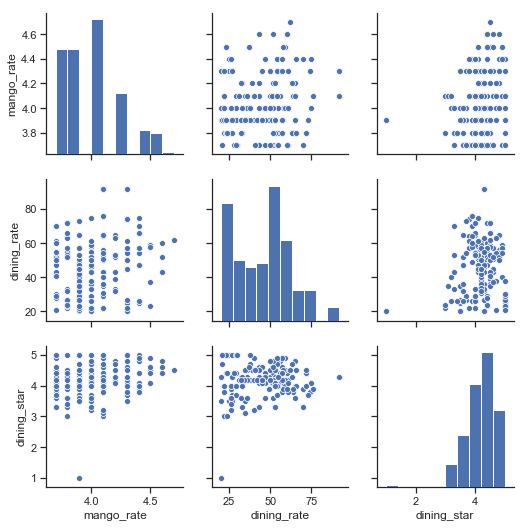

In [23]:
#자료 분포도(scatter plot, 막대 그래프)

sns.pairplot(df_corr)
plt.savefig('돈까스1.png')

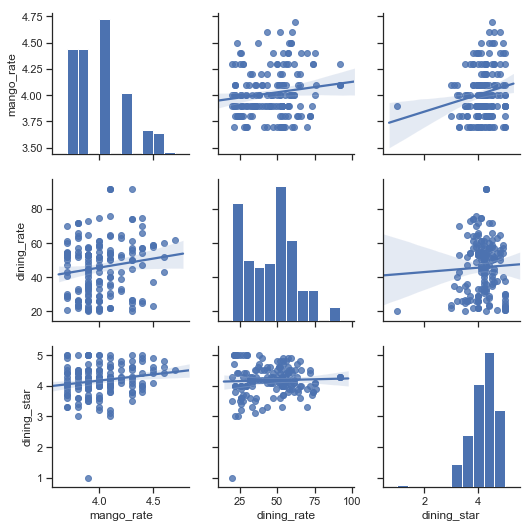

In [24]:
#선 추가

sns.set(style="ticks", color_codes=True)
sns.pairplot(df_corr,kind="reg")
plt.savefig('돈까스2.png')